In [1]:
import pandas as pd
fruits = pd.DataFrame({'数值特征':[5,6,7,8,9],
                   '类型特征':['西瓜','香蕉','桔子','苹果','葡萄']})
display(fruits)

,数值特征,类型特征
0,5,西瓜
1,6,香蕉
2,7,桔子
3,8,苹果
4,9,葡萄


In [2]:
fruits_dum = pd.get_dummies(fruits)
display(fruits_dum)

,数值特征,类型特征_桔子,类型特征_苹果,类型特征_葡萄,类型特征_西瓜,类型特征_香蕉
0,5,0,0,0,1,0
1,6,0,0,0,0,1
2,7,1,0,0,0,0
3,8,0,1,0,0,0
4,9,0,0,1,0,0


In [3]:
fruits['数值特征'] = fruits['数值特征'].astype(str)
pd.get_dummies(fruits, columns=['数值特征'])

,类型特征,数值特征_5,数值特征_6,数值特征_7,数值特征_8,数值特征_9
0,西瓜,1,0,0,0,0
1,香蕉,0,1,0,0,0
2,桔子,0,0,1,0,0
3,苹果,0,0,0,1,0
4,葡萄,0,0,0,0,1


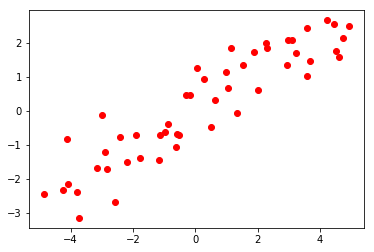

In [4]:
import numpy as np
import matplotlib.pyplot as plt
rnd = np.random.RandomState(38)
x = rnd.uniform(-5,5,size=50)
y_no_noise = (np.cos(6*x)+x)
X = x.reshape(-1,1)
y = (y_no_noise + rnd.normal(size=len(x)))/2
plt.plot(X,y,'o',c='r')
plt.show()

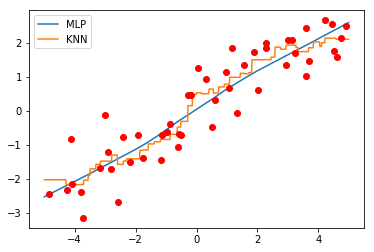

In [5]:
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
line = np.linspace(-5,5,1000,endpoint=False).reshape(-1,1)
mlpr = MLPRegressor().fit(X,y)
knr = KNeighborsRegressor().fit(X,y)
plt.plot(line, mlpr.predict(line),label='MLP')
plt.plot(line, knr.predict(line),label='KNN')
plt.plot(X,y,'o',c='r')
plt.legend(loc='best')
plt.show()

In [6]:
bins = np.linspace(-5,5,11)
target_bin = np.digitize(X, bins=bins)
print('装箱数据范围：\n{}'.format(bins))
print('\n前十个数据点的特征值：\n{}'.format(X[:10]))
print('\n前十个数据点所在的箱子：\n{}'.format(target_bin[:10]))

装箱数据范围：
[-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]

前十个数据点的特征值：
[[-1.1522688 ]
 [ 3.59707847]
 [ 4.44199636]
 [ 2.02824894]
 [ 1.33634097]
 [ 1.05961282]
 [-2.99873157]
 [-1.12612112]
 [-2.41016836]
 [-4.25392719]]

前十个数据点所在的箱子：
[[ 4]
 [ 9]
 [10]
 [ 8]
 [ 7]
 [ 7]
 [ 3]
 [ 4]
 [ 3]
 [ 1]]


In [7]:
from sklearn.preprocessing import OneHotEncoder
onehot = OneHotEncoder(sparse = False)
onehot.fit(target_bin)
X_in_bin = onehot.transform(target_bin)
print('装箱后的数据形态：{}'.format(X_in_bin.shape))
print('\n装箱后的前十个数据点：\n{}'.format(X_in_bin[:10]))

装箱后的数据形态：(50, 10)

装箱后的前十个数据点：
[[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


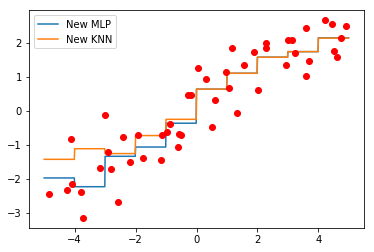

In [8]:
new_line = onehot.transform(np.digitize(line,bins=bins))

new_mlpr = MLPRegressor().fit(X_in_bin, y)
new_knr = KNeighborsRegressor().fit(X_in_bin,y)

plt.plot(line, new_mlpr.predict(new_line),label='New MLP')
plt.plot(line, new_knr.predict(new_line),label='New KNN')

plt.plot(X,y,'o',c='r')
plt.legend(loc='best')
plt.show()

In [9]:
array_1 = [1,2,3,4,5]
array_2 = [6,7,8,9,0]
array_3 = np.hstack((array_1, array_2))
print('将数组2添加到数据1中后得到:{}'.format(array_3))

将数组2添加到数据1中后得到:[1 2 3 4 5 6 7 8 9 0]


In [10]:
X_stack = np.hstack([X, X_in_bin])
X_stack.shape

(50, 11)

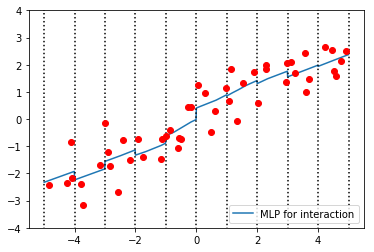

In [11]:
line_stack = np.hstack([line, new_line])
mlpr_interact = MLPRegressor().fit(X_stack, y)
plt.plot(line, mlpr_interact.predict(line_stack), 
         label='MLP for interaction')
plt.ylim(-4,4)
for vline in bins:
    plt.plot([vline,vline],[-5,5],':',c='k')
plt.legend(loc='lower right')
plt.plot(X, y,'o',c='r')
plt.show()

In [12]:
X_multi = np.hstack([X_in_bin, X*X_in_bin])
print(X_multi.shape)
print(X_multi[0])

(50, 20)
[ 0.         0.         0.         1.         0.         0.         0.         0.
  0.         0.        -0.        -0.        -0.        -1.1522688 -0.        -0.
 -0.        -0.        -0.        -0.       ]


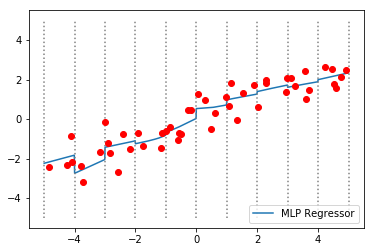

In [13]:
mlpr_multi = MLPRegressor().fit(X_multi, y)
line_multi = np.hstack([new_line, line * new_line])
plt.plot(line, mlpr_multi.predict(line_multi), label = 'MLP Regressor')
for vline in bins:
    plt.plot([vline,vline],[-5,5],':',c='gray')
plt.plot(X, y, 'o', c='r')
plt.legend(loc='lower right')
plt.show()

In [14]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=20, include_bias = False)
X_poly = poly.fit_transform(X)
print (X_poly.shape)

(50, 20)


In [15]:
print('原始数据集中的第一个样本特征：\n{}'.format(X[0]))
print('\n处理后的数据集中第一个样本特征：\n{}'.format(X_poly[0]))

原始数据集中的第一个样本特征：
[-1.1522688]

处理后的数据集中第一个样本特征：
[ -1.1522688    1.3277234   -1.52989425   1.76284942  -2.0312764
   2.34057643  -2.6969732    3.10763809  -3.58083443   4.1260838
  -4.75435765   5.47829801  -6.3124719    7.27366446  -8.38121665
   9.65741449 -11.12793745  12.82237519 -14.77482293  17.02456756]


In [16]:
print ('PolynomialFeatures对原始数据的处理:\n{}'.format(
    poly.get_feature_names()))

PolynomialFeatures对原始数据的处理:
['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10', 'x0^11', 'x0^12', 'x0^13', 'x0^14', 'x0^15', 'x0^16', 'x0^17', 'x0^18', 'x0^19', 'x0^20']


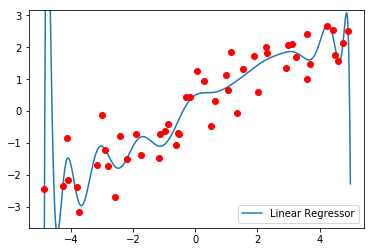

In [17]:
from sklearn.linear_model import LinearRegression

LNR_poly = LinearRegression().fit(X_poly, y)
line_poly = poly.transform(line)

plt.plot(line,LNR_poly.predict(line_poly), label='Linear Regressor')
plt.xlim(np.min(X)-0.5,np.max(X)+0.5)
plt.ylim(np.min(y)-0.5,np.max(y)+0.5)
plt.plot(X,y,'o',c='r')
plt.legend(loc='lower right')
plt.show()

In [18]:
import pandas as pd
stock = pd.read_csv('d:/stock dataset/071013.csv',encoding='GBK')
print(stock.head())

   代码    名称  涨幅%%     现价    涨跌     买价     卖价      总量    现量  涨速%%   ...    \
0   1  平安银行 -1.65  11.36 -0.19  11.36  11.37  737376  3892 -0.08   ...     
1   2  万 科Ａ -0.63  26.93 -0.17  26.93  26.94  329928  2118 -0.06   ...     
2   8  神州高铁 -1.32   9.00 -0.12   9.00   9.01   56935  2627 -0.10   ...     
3   9  中国宝安  0.91   8.91  0.08   8.91   8.92  163332  1009  0.11   ...     
4  11  深物业A  0.20  19.78  0.04  19.78  19.79   38892   646  0.05   ...     

         总金额    量比  振幅%%     均价      内盘      外盘   内外比    买量    卖量  流通股(亿)  
0  839662720  0.92  2.68  11.39  403288  334087  1.21  1854   912  169.18  
1  894966592  0.75  2.84  27.13  168060  161868  1.04  2186   419   97.09  
2   51353664  0.59  1.75   9.02   32844   24091  1.36  1119    89   19.89  
3  145907936  0.53  1.81   8.93   79827   83505  0.96  1413  1237   21.20  
4   76952808  0.56  1.01  19.79   21388   17503  1.22   176   104    1.76  

[5 rows x 26 columns]


In [19]:
y = stock['涨幅%%']
print(y.shape)
print(y[0])

(2860,)
-1.65


In [20]:
features = stock.loc[:,'现价':'流通股(亿)']
X = features.values
print(X.shape)
print(X[:1])

(2860, 23)
[[  1.13600000e+01  -1.90000000e-01   1.13600000e+01   1.13700000e+01
    7.37376000e+05   3.89200000e+03  -8.00000000e-02   4.40000000e-01
    1.15600000e+01   1.15600000e+01   1.12500000e+01   1.15500000e+01
    7.77000000e+00   8.39662720e+08   9.20000000e-01   2.68000000e+00
    1.13900000e+01   4.03288000e+05   3.34087000e+05   1.21000000e+00
    1.85400000e+03   9.12000000e+02   1.69180000e+02]]


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
mlpr=MLPRegressor(random_state=62, hidden_layer_sizes=(100,100),alpha=0.001)
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=62)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
mlpr.fit(X_train_scaled, y_train)
print('模型准确率：{:.2f}'.format(mlpr.score(X_test_scaled,y_test)))

模型准确率：0.95


In [22]:
wanted = stock.loc[:,'名称']
print(wanted[y>=9])

779     科林环保
1099    长缆科技
1265    鸿特精密
Name: 名称, dtype: object


In [23]:
from sklearn.feature_selection import SelectPercentile
select = SelectPercentile(percentile=50)
select.fit(X_train_scaled, y_train)
X_train_selected = select.transform(X_train_scaled)
print('经过缩放的特征形态：{}'.format(X_train_scaled.shape))
print('特征选择后的特征形态:{}'.format(X_train_selected.shape))

经过缩放的特征形态：(2145, 23)
特征选择后的特征形态:(2145, 11)


In [24]:
mask = select.get_support()
print(mask)

[False  True False False  True  True False  True False False False False
 False  True  True  True False  True  True  True  True False False]


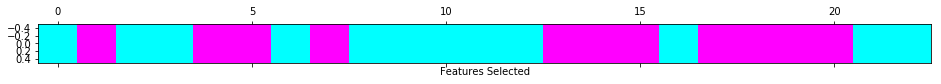

In [25]:
plt.matshow(mask.reshape(1,-1),cmap=plt.cm.cool)
plt.xlabel("Features Selected")
plt.show()

In [26]:
X_test_selected = select.transform(X_test_scaled)
mlpr_sp=MLPRegressor(random_state=62, hidden_layer_sizes=(100,100),
                      alpha=0.001)
mlpr_sp.fit(X_train_selected, y_train)
print('特征选择后模型得分：{:.2f}'.format(mlpr_sp.score(X_test_selected, 
                                              y_test)))

特征选择后模型得分：0.87


In [29]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor
sfm = SelectFromModel(RandomForestRegressor(n_estimators=100, 
                                            random_state=38),
                     threshold='median')
sfm.fit(X_train_scaled, y_train)
X_train_sfm = sfm.transform(X_train_scaled)
print('基于随机森林模型进行特征后的数据形态：{}'.format(X_train_sfm.shape))

基于随机森林模型进行特征后的数据形态：(2145, 12)


In [30]:
mask_sfm = sfm.get_support()
print(mask_sfm)

[False  True False False False False False  True  True  True  True  True
 False  True  True  True False False False  True False  True  True]


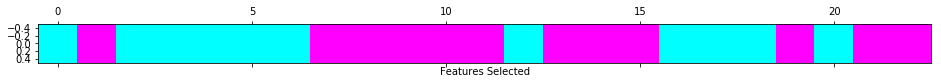

In [31]:
plt.matshow(mask_sfm.reshape(1,-1),cmap=plt.cm.cool)
plt.xlabel('Features Selected')
plt.show()

In [34]:
X_test_sfm = sfm.transform(X_test_scaled)
mlpr_sfm=MLPRegressor(random_state=62, hidden_layer_sizes=(100,100),
                      alpha=0.001)
mlpr_sfm.fit(X_train_sfm, y_train)
print('随机森林进行特征选择后的模型得分：{:.2f}'.format(
    mlpr_sfm.score(X_test_sfm, y_test)))

随机森林进行特征选择后的模型得分：0.97


In [50]:
from sklearn.feature_selection import RFE
rfe = RFE(RandomForestRegressor(n_estimators=100,
                                 random_state=38),
         n_features_to_select=12)
rfe.fit(X_train_scaled, y_train)
mask = rfe.get_support()
print(mask)

[ True  True False False  True False False  True  True False  True  True
 False  True  True  True  True False False  True False False False]


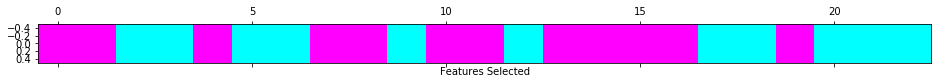

In [51]:
plt.matshow(mask.reshape(1,-1), cmap=plt.cm.cool)
plt.xlabel('Features Selected')
plt.show()

In [54]:
X_train_rfe = rfe.transform(X_train_scaled)
X_test_rfe = rfe.transform(X_test_scaled)
mlpr_rfe = MLPRegressor(random_state=62, hidden_layer_sizes=(100,100),
                      alpha=0.001)
mlpr_rfe.fit(X_train_rfe, y_train)
print("RFE选择特征后的模型得分：{:.2f}".format(mlpr_rfe.score(X_test_rfe,
                                                  y_test)))

RFE选择特征后的模型得分：0.95


In [53]:
print('{:.2f}'.format(rfe.score(X_test_scaled, y_test)))

0.96
